In [247]:
#Initials - Pc and dp in natural units 

import math 
k = 0.05
GA = 5/3
pi = math.pi

def R0(Pc,dp):
   dc = ((Pc*(1/GeV)/k)**(1/GA) + (Pc*(1/GeV)/(GA - 1)))*(GeV)
   P = Pc - dp 
   
   return  ((3/(2*pi*(3*Pc + dc)))*((math.log(dc + Pc)) - (math.log((P/k)**(1/GA) +(P/(GA - 1)) + P))))**(0.5)

def M0(Pc,dp):
    dc = ((Pc*(1/GeV)/k)**(1/GA) + (Pc*(1/GeV)/(GA - 1)))*(GeV)
    P = Pc - dp 
    return (math.log((dc + Pc)) -(math.log(((P/k)**(1/GA) + (P/(GA - 1))) + P)))*(2*dc/(3*Pc + dc))*R0(Pc,dp)
  

Text(0, 0.5, 'm')

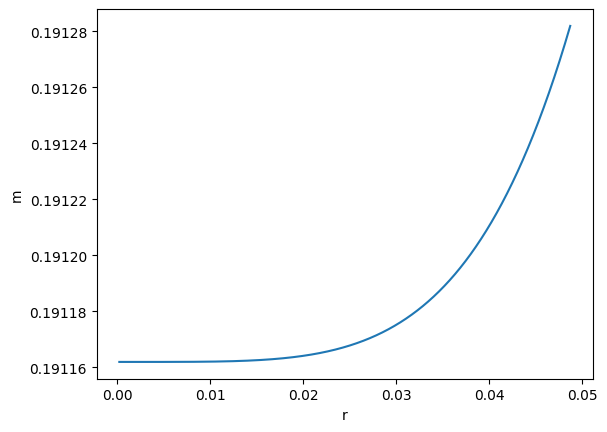

In [266]:
import numpy as np
import math
import matplotlib.pyplot as plot
from scipy.integrate import odeint

k = 0.05
GA = 5/3
pi = math.pi

#Conversion for scaling
MeV = 1 
GeV = 1000*MeV
fm  = 1
c   = 1
metres = (10**15)*fm
second = 3*(10**8)*metres
kg = (second**2)/((1.6*(10**(-13)))*((metres)**2))
G = 6.67*10**(-11)*((metres)**3)/(kg*(second)**2)

#Defining the values in terms
Rs = ((2*G*(2*(10**30)*kg))/((c**2)))
K1 =  ((4*pi*(Rs**3))/(2*((10**30)*kg)*(c**2)))*(GeV/(fm)**3)

def f(x,P):
   m,r = x
   d = (((P*(10**3))/k)**(1/GA) + (P*(10**3))/(GA - 1))*(10**-3)
   dmdp = -(2*K1*(r**3)*d*(r-m))/((d + P)*(m + K1*P*(r**3)))
   drdp = -(2*r*(r - m))/((d + P)*(m + K1*P*(r**3)))
   return [dmdp , drdp]

#Central Pressures
Pc = np.linspace(0.01,1000,1000)
#Initials
Ro =  R0(Pc = 0.01*GeV,  dp = (10**(-6)))
Mo =  M0(Pc = 0.01*GeV,  dp = (10**(-6)))
x0 = [Mo,Ro]

#P0 = Pc- dp
P0 = 0.01*GeV - (10**(-6))


P = np.linspace(1e-6, P0, 10000)

solve = odeint(f,x0, P[::-1])

m =solve[:,0]
r = solve[:,1]

plot.plot(r,m)
plot.xlabel("r")
plot.ylabel("m")
#plot.ylim(0,0.25*10**-6)


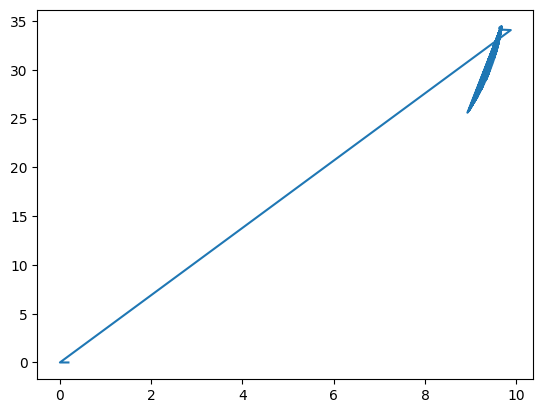

In [279]:
#Central Pressures
M = []
R = []
    
Pc = np.linspace(0.01,1000,1000)

for i in Pc:
    
  #Initials
  Ro =  R0(Pc = i*GeV,  dp = (10**(-6)))
  Mo =  M0(Pc = i*GeV,  dp = (10**(-6)))
  x0 = [Mo,Ro]

  #P0 = Pc- dp
  P0 = i*GeV - (10**(-6))

  P = np.linspace(1e-6, P0, 100)

  solve = odeint(f,x0, P[::-1])

  m =solve[:,0]
  r = solve[:,1]

  M.append(m[-1])
  R.append(r[-1])  
  
M
R
plot.plot(M,R)
#plot.xlim(9,15)